# Лабораторная работа 4
## Линейные модели, SVM и деревья решений.
Цель лабораторной работы: изучение линейных моделей, SVM и деревьев решений.

Выберите набор данных (датасет) для решения задачи классификации или регрессии.
В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
С использованием метода train_test_split разделите выборку на обучающую и тестовую.

Обучите следующие модели:

 - одну из линейных моделей (линейную или полиномиальную регрессию при решении задачи регрессии, логистическую регрессию при решении задачи классификации);
 - SVM;
 - дерево решений.

Оцените качество моделей с помощью двух подходящих для задачи метрик. Сравните качество полученных моделей.

Постройте график, показывающий важность признаков в дереве решений.

Визуализируйте дерево решений или выведите правила дерева решений в текстовом виде.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score, precision_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

target_col='TargetClass'

%matplotlib inline 
sns.set(style="ticks")

In [2]:
data = pd.read_csv('./Star3642_balanced.csv')
data.head()

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,5.99,13.73,0.58,1.318,K5III,16.678352,0
1,8.70,2.31,1.29,-0.045,B1II,15.518060,0
2,5.77,5.50,1.03,0.855,G5III,14.471813,0
3,6.72,5.26,0.74,-0.015,B7V,15.324928,1
4,8.76,13.44,1.16,0.584,G0V,19.401997,1


In [3]:
data.shape

(3642, 7)

## Удаляем пустые значения и кодируем категориальные признаки

In [4]:
data = data.dropna(axis=1, how='any')
data.head()

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,5.99,13.73,0.58,1.318,K5III,16.678352,0
1,8.70,2.31,1.29,-0.045,B1II,15.518060,0
2,5.77,5.50,1.03,0.855,G5III,14.471813,0
3,6.72,5.26,0.74,-0.015,B7V,15.324928,1
4,8.76,13.44,1.16,0.584,G0V,19.401997,1


In [5]:
for col in data.columns:
    null_count = data[data[col].isnull()].shape[0]
    if null_count == 0:
        column_type = data[col].dtype
        print('{} - {} - {}'.format(col, column_type, null_count))

Vmag - float64 - 0
Plx - float64 - 0
e_Plx - float64 - 0
B-V - float64 - 0
SpType - object - 0
Amag - float64 - 0
TargetClass - int64 - 0


Категориальные признаки

In [6]:
le = LabelEncoder()
for col in data.columns:
    column_type = data[col].dtype
    if column_type == 'object':
        data[col] = le.fit_transform(data[col]);
        print(col)

SpType


## Разделение выборки на обучающую и тестовую


In [7]:
X = data.drop(target_col, axis=1)
Y = data[target_col]

In [8]:
X

,Vmag,Plx,e_Plx,B-V,SpType,Amag
0,5.99,13.73,0.58,1.318,522,16.678352
1,8.70,2.31,1.29,-0.045,99,15.518060
2,5.77,5.50,1.03,0.855,337,14.471813
3,6.72,5.26,0.74,-0.015,150,15.324928
4,8.76,13.44,1.16,0.584,293,19.401997
...,...,...,...,...,...,...
3637,7.29,3.26,0.95,1.786,515,14.856089
3638,8.29,6.38,1.00,0.408,208,17.314104
3639,6.11,2.42,0.79,1.664,539,13.029078
3640,7.94,4.94,2.90,0.210,53,16.408636


In [9]:
Y

0       0
1       0
2       0
3       1
4       1
       ..
3637    0
3638    1
3639    0
3640    1
3641    0
Name: TargetClass, Length: 3642, dtype: int64

In [10]:
pd.DataFrame(X, columns=X.columns).describe()

,Vmag,Plx,e_Plx,B-V,SpType,Amag
count,3642.000000,3642.000000,3642.000000,3642.000000,3642.000000,3642.000000
mean,8.120530,7.606153,1.176568,0.827077,345.969797,16.427388
std,1.338875,11.924052,0.919999,0.436699,141.225224,2.428144
min,0.450000,-6.820000,0.470000,-0.196000,0.000000,2.820000
25%,7.370000,2.740000,0.840000,0.487250,244.000000,15.150312
50%,8.390000,4.950000,1.040000,0.867000,375.000000,16.392485
75%,9.060000,8.670000,1.270000,1.136000,462.000000,18.029836
max,12.490000,280.270000,30.290000,2.530000,583.000000,29.249165


Разделим выборку на обучающую и тестовую:

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1)
print('{}, {}'.format(X_train.shape, X_test.shape))
print('{}, {}'.format(Y_train.shape, Y_test.shape))

(2731, 6), (911, 6)
(2731,), (911,)


## Обучение моделей

### Линейная модель

In [12]:
SGD = SGDClassifier(max_iter=10000)
SGD.fit(X_train, Y_train)

SGDClassifier(max_iter=10000)

In [13]:
f1_score(Y_test, SGD.predict(X_test), average='micro')
precision_score(Y_test, SGD.predict(X_test), average='micro')

0.8913282107574094

### SVM

In [14]:
SVC = SVC(kernel='rbf')
SVC.fit(X_train, Y_train)

SVC()

In [15]:
f1_score(Y_test, SVC.predict(X_test), average='micro')
precision_score(Y_test, SVC.predict(X_test), average='micro')

0.8529088913282108

### Дерево решений

In [16]:
DT = DecisionTreeClassifier(random_state=1)
DT.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=1)

In [17]:
f1_score(Y_test, DT.predict(X_test), average='micro')
precision_score(Y_test, DT.predict(X_test), average='micro')

0.9012074643249177

Можно сделать вывод, что дерево решений дает лучший результат

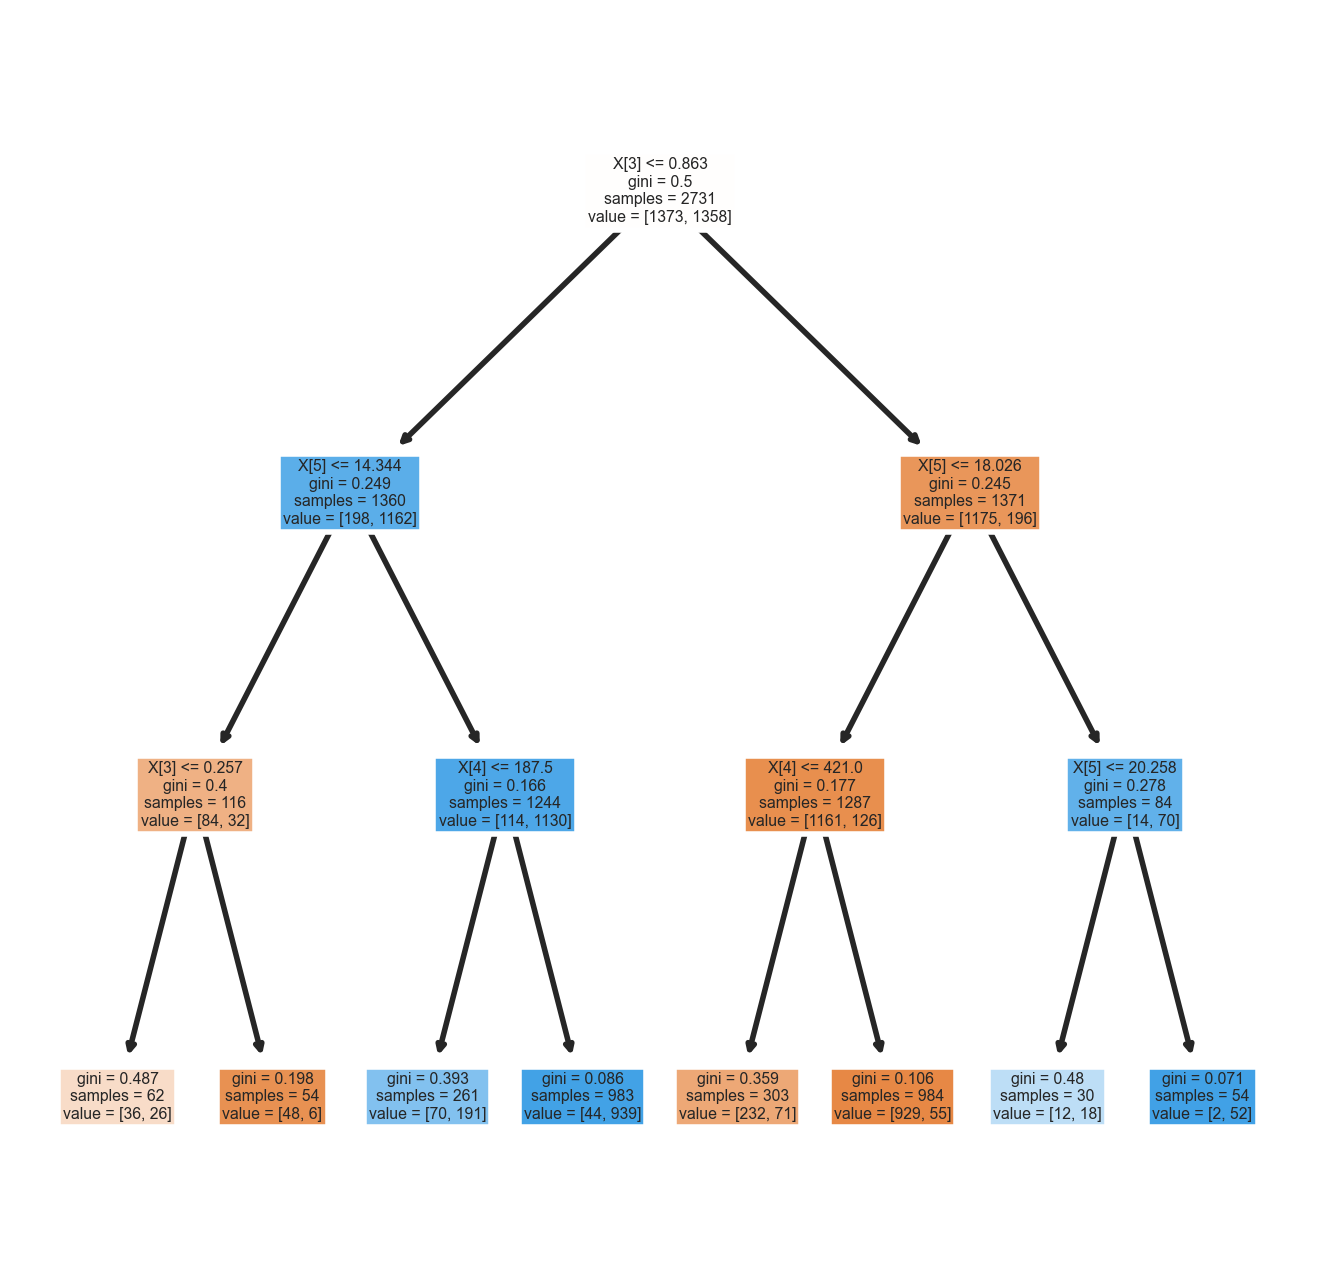

In [18]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=400)
clf = DecisionTreeClassifier(max_depth = 3, 
                             random_state = 0)
clf.fit(X_train, Y_train)
tree.plot_tree(clf, filled = True);